In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/chemical-concentration-readings.csv')
print('Shape of the dataset:', df.shape)
df.head(10)

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


Text(0, 0.5, 'Chemical concentration')

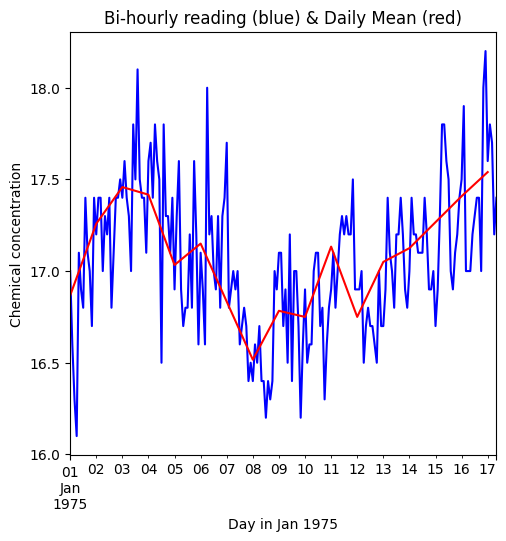

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/chemical-concentration-readings.csv')

datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid

daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Day in Jan 1975')
ax.set_ylabel('Chemical concentration')
#51

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
print('Shape of the dataset:', df.shape)
df.head(10)

Shape of the dataset: (1461, 2)


,Date,Mean temparature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


Text(0, 0.5, 'Temperature')

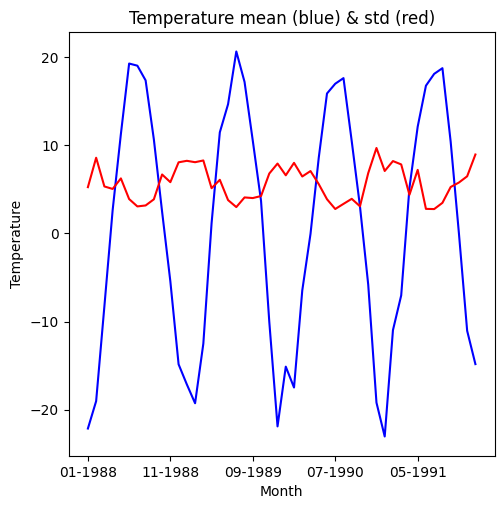

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')

datetime_rowid = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
df.index = datetime_rowid

df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

#monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median, np.std])
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate(['mean', 'median', 'std'])
monthly_stats.reset_index(inplace=True)

monthly_stats['Year'] = monthly_stats['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)

monthly_stats.index = monthly_stats['Month_Year']  #.map(lambda d: pd.to_datetime(d, format='%m-%Y'))
#monthly_stats.head(20)
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')
ax.set_title('Temperature mean (blue) & std (red)')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')


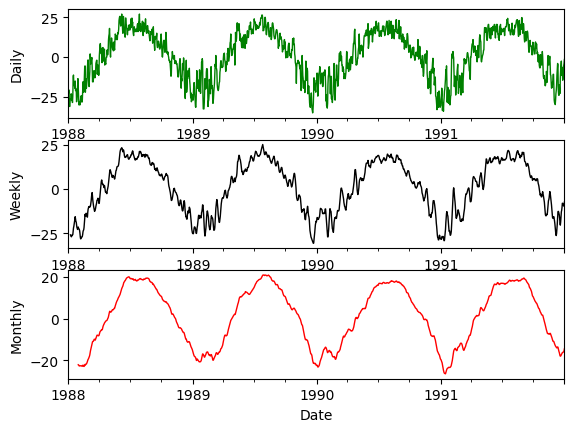

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')

datetime_rowid = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
df.index = datetime_rowid

weekly_moving_average = df['Mean temparature'].rolling(7).mean()

monthly_moving_average = df['Mean temparature'].rolling(30).mean()

# weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
# monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Daily')
df['Mean temparature'].plot(ax=ax1, color='g', lw=1.)
ax2 = fig.add_subplot(312, ylabel='Weekly')
weekly_moving_average.plot(ax=ax2, color='black', lw=1.)
ax3 = fig.add_subplot(313, ylabel='Monthly')
monthly_moving_average.plot(ax=ax3, color='r', lw=1.)
plt.show()

C:\Users\Nero\AppData\Local\Temp\ipykernel_12688\3109411933.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_df.index = pd.to_datetime(djia_df.index)


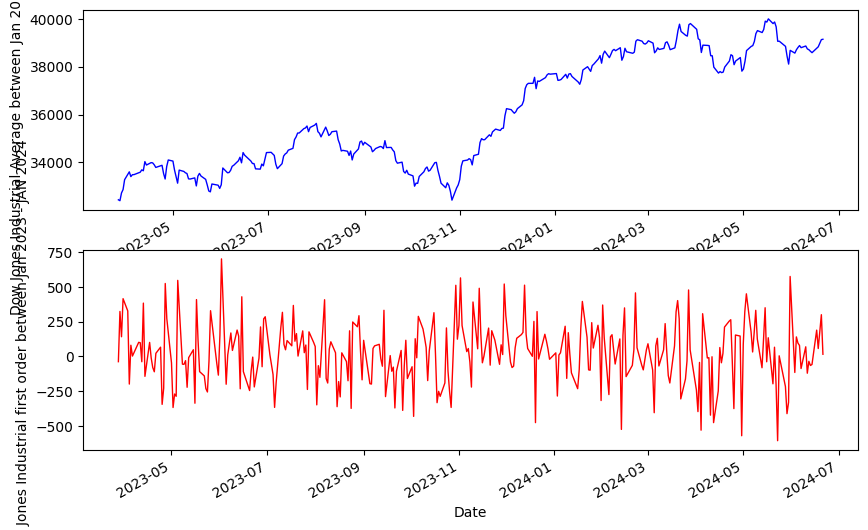

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

djia_df = pd.read_csv('datasets/DJI_HistoricalPrices.csv', index_col=0)
djia_df.index = pd.to_datetime(djia_df.index)
djia_df.columns = djia_df.columns.str.strip()
djia_df = djia_df.iloc[::-1]

first_order_diff = djia_df['Close'].diff(1)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311, ylabel='Dow Jones Industrial Average between Jan 2023 - JAN 2024')
djia_df['Close'].plot(ax=ax1, color='b', lw=1.)
ax2 = fig.add_subplot(312, ylabel='Dow Jones Industrial first order between Jan 2023 - JAN 2024')
first_order_diff.plot(ax=ax2, color='r', lw=1.)
plt.show()

C:\Users\Nero\AppData\Local\Temp\ipykernel_7712\3008176907.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_df.index = pd.to_datetime(djia_df.index)


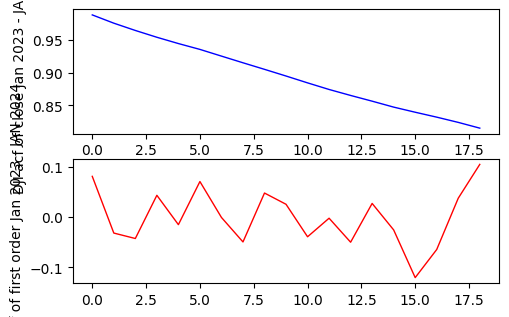

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot

djia_df = pd.read_csv('datasets/DJI_HistoricalPrices.csv', index_col=0)
djia_df.index = pd.to_datetime(djia_df.index)
djia_df.columns = djia_df.columns.str.strip()
djia_df = djia_df.iloc[::-1]

first_order_diff = djia_df['Close'].diff(1).iloc[1:]

acf_close_dji = sm.tsa.stattools.acf(djia_df['Close'])

acf_first_order_dji = sm.tsa.stattools.acf(first_order_diff)

fig = plt.figure(figsize=(5.5, 5.5))
ax1 = fig.add_subplot(311, ylabel='DJI acf of close Jan 2023 - JAN 2024')
pd.Series(data=acf_close_dji[1:20]).plot(ax=ax1, color='b', lw=1.)
ax2 = fig.add_subplot(312, ylabel='DJI acf of first order Jan 2023 - JAN 2024')
pd.Series(data=acf_first_order_dji[1:20]).plot(ax=ax2, color='r', lw=1.)
plt.show()

# fig, ax = plt.subplots(2, sharex=True)
# fig.set_size_inches(5.5, 5.5)
# autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
# ax[0].set_title('ACF of DJIA Close values')
# autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
# ax[1].set_title('ACF of first differences of DJIA Close values')
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

# 60

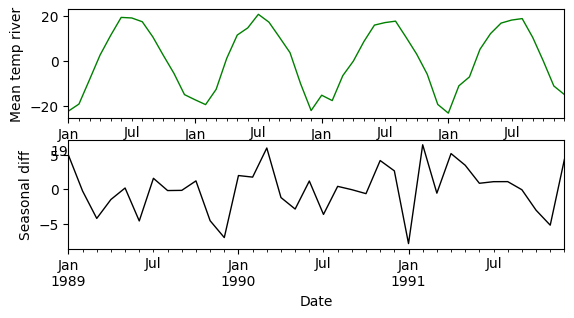

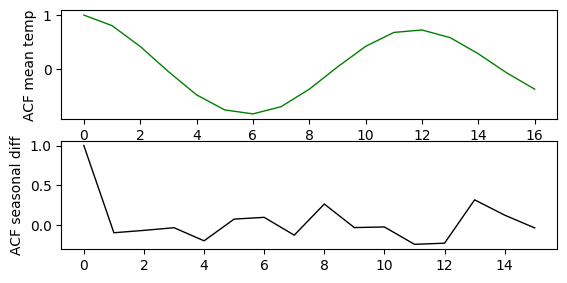

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')

datetime_rowid = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
df.index = datetime_rowid

monthly_temp = df['Mean temparature'].resample('ME')

monthly_mean_temp = monthly_temp.mean()

seasonal_diff = monthly_mean_temp.diff(12)[12:]

acf_mean_temp = sm.tsa.stattools.acf(monthly_mean_temp)

acf_season_temp = sm.tsa.stattools.acf(seasonal_diff)

fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Mean temp river')
monthly_mean_temp.plot(ax=ax1, color='g', lw=1.)
ax2 = fig.add_subplot(312, ylabel='Seasonal diff')
seasonal_diff.plot(ax=ax2, color='black', lw=1.)
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='ACF mean temp')
pd.Series(data=acf_mean_temp).plot(ax=ax1, color='g', lw=1.)
ax2 = fig.add_subplot(312, ylabel='ACF seasonal diff')
pd.Series(data=acf_season_temp).plot(ax=ax2, color='black', lw=1.)
plt.show()

# fig, ax = plt.subplots(2, sharex=True)
# fig.set_size_inches(5.5, 5.5)
# autocorrelation_plot(acf_mean_temp, color='b', ax=ax[0])
# ax[0].set_title('ACF mean temp')
# autocorrelation_plot(acf_season_temp, color='r', ax=ax[1])
# ax[1].set_title('ACF seasonal diff')
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')

datetime_rowid = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
df.index = datetime_rowid

monthly_temp = df['Mean temparature'].resample('ME')

monthly_mean_temp = monthly_temp.mean()

seasonal_diff = monthly_mean_temp.diff(12)[12:]

_, _, _, pval_monthly_mean = sm.tsa.stattools.acf(monthly_mean_temp, nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

_, _, _, pval_seasonal_diff = sm.tsa.stattools.acf(seasonal_diff, nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

# 65

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)
Null hypothesis is rejected for lags: (array([], dtype=int64),)


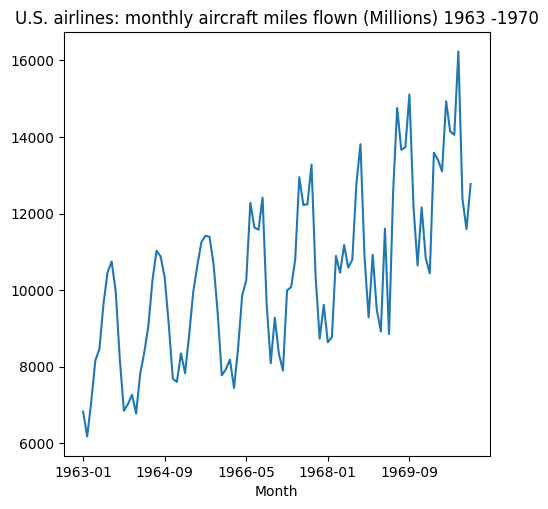

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles['Air miles flown'] = air_miles['U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970']
air_miles.index = air_miles['Month']

fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970')
ax.set_xlabel('Month')

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles['Air miles flown'] = air_miles['U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970']
air_miles.index = air_miles['Month']

adf_result = sm.tsa.stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

adf_result

# 69

(np.float64(nan),
 np.float64(nan),
 0,
 96,
 {'1%': np.float64(-3.5003788874873405),
  '5%': np.float64(-2.8921519665075235),
  '10%': np.float64(-2.5830997960069446)},
 np.float64(nan))

Text(0.5, 1.0, '5-day Moving Average')

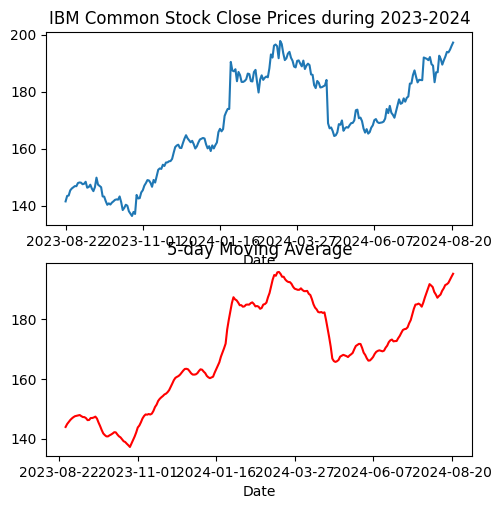

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

ibm_df = pd.read_csv('datasets/IBM.csv')
#ibm_df = ibm_df.iloc[::-1]
ibm_df.index = ibm_df['Date']
#ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)

ibm_df['5-Day Moving Avg'] = ibm_df['Close'].rolling(5).mean()
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 2023-2024')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')

Text(0.5, 1.0, 'MA3')

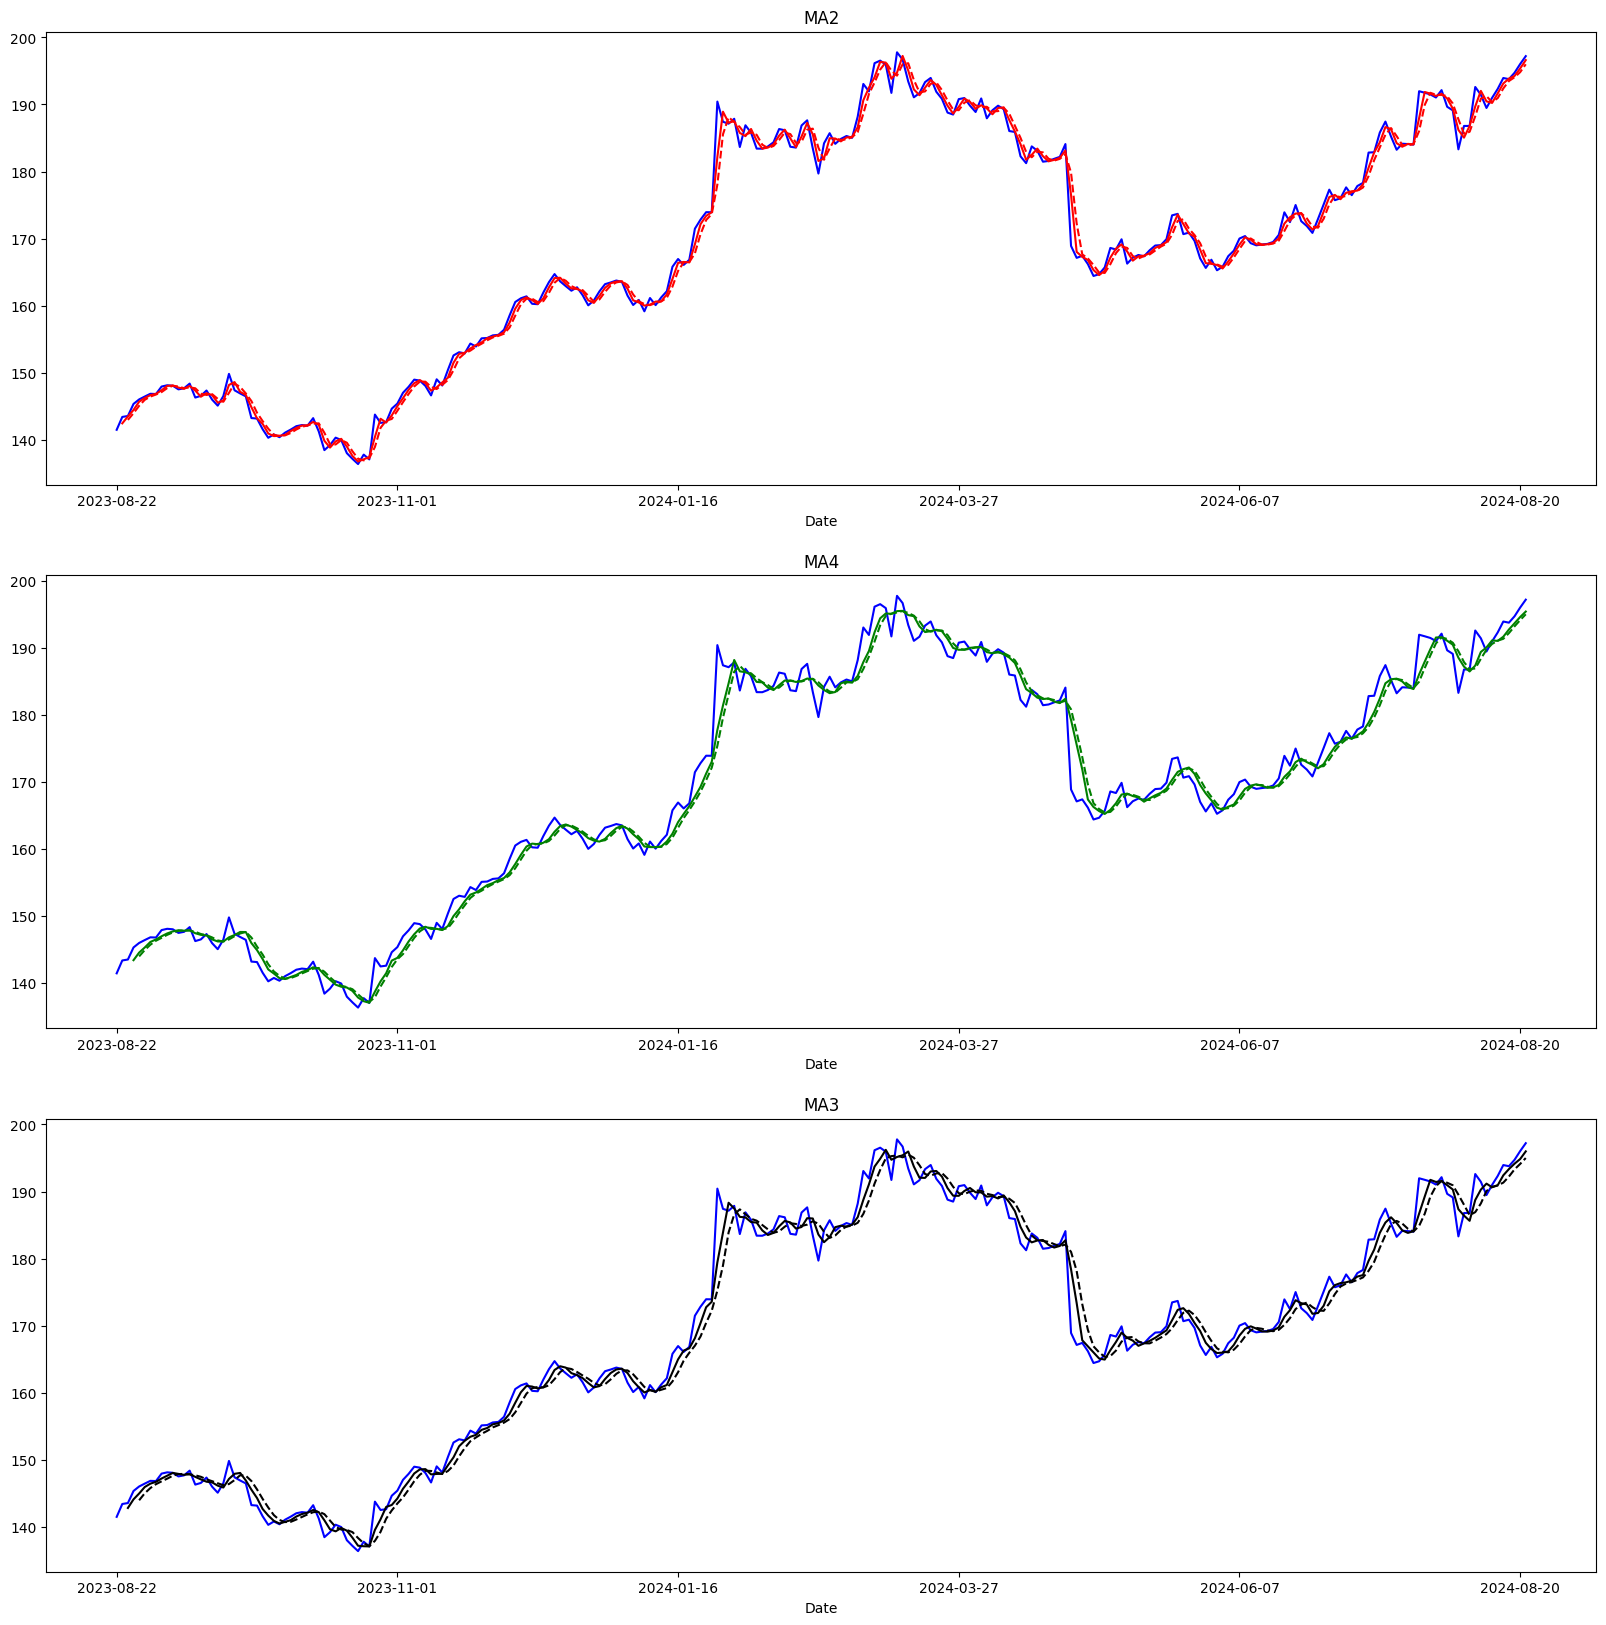

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

ibm_df = pd.read_csv('datasets/IBM.csv')
ibm_df.index = ibm_df['Date']

MA2 = ibm_df['Close'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3,1,1)
ibm_df['Close'].plot(ax=ax, color='blue')
MA2.plot(ax=ax, color='r')
TwoXMA2.plot(ax=ax, color='r', linestyle='dashed')
ax.set_title('MA2')

ax = fig.add_subplot(3,1,2)
ibm_df['Close'].plot(ax=ax, color='blue')
MA4.plot(ax=ax, color='g')
TwoXMA4.plot(ax=ax, color='g', linestyle='dashed')
ax.set_title('MA4')

ax = fig.add_subplot(3,1,3)
ibm_df['Close'].plot(ax=ax, color='blue')
MA3.plot(ax=ax, color='black')
ThreeXMA3.plot(ax=ax, color='black', linestyle='dashed')
ax.set_title('MA3')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

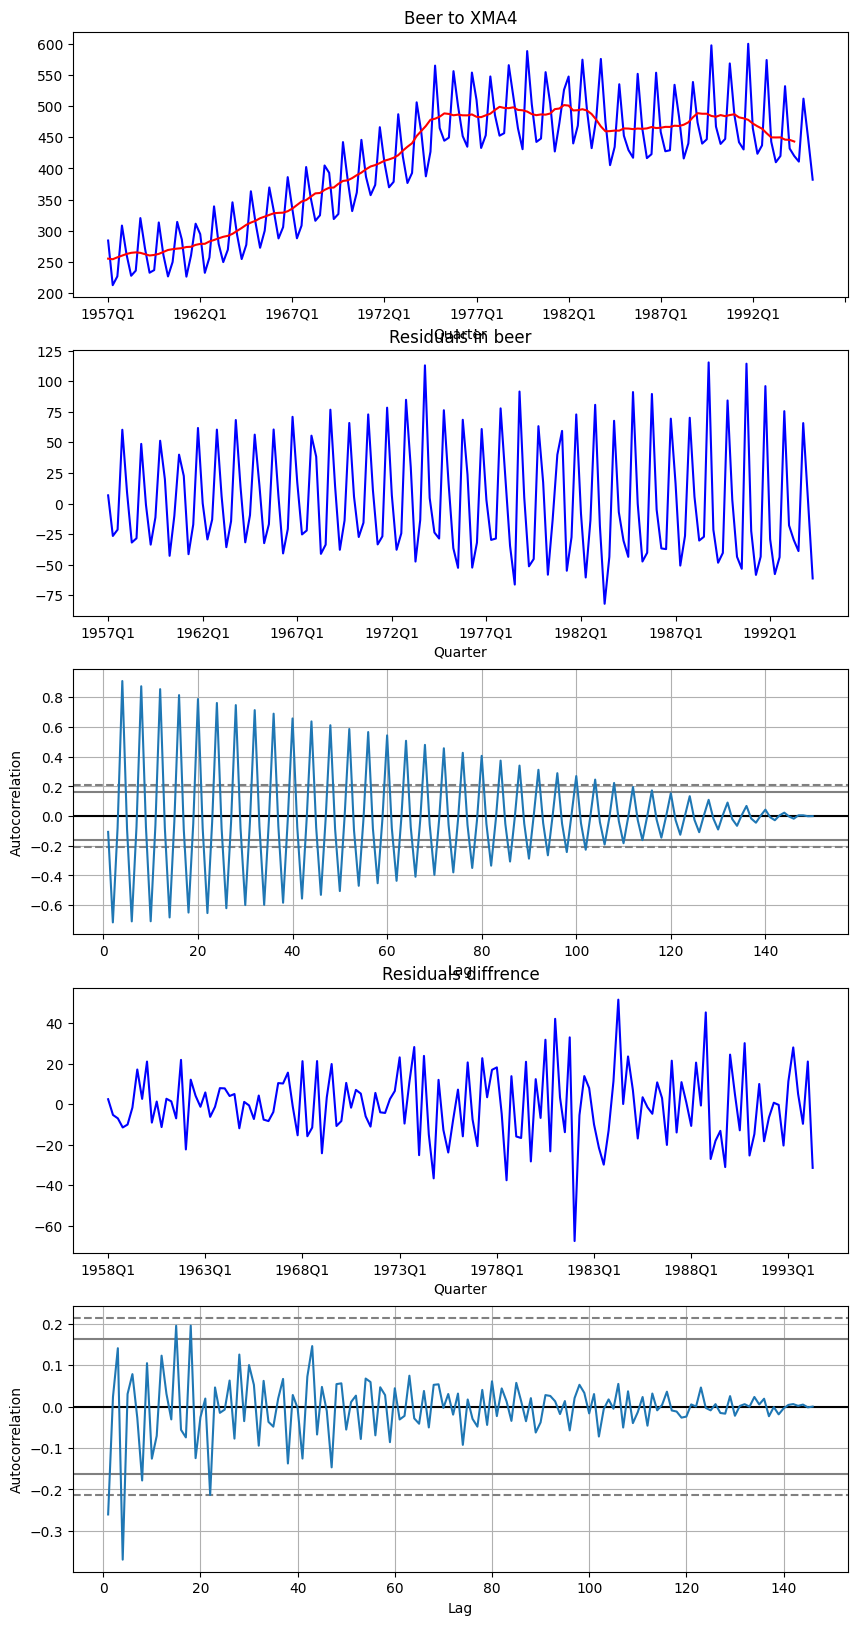

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod'}, inplace=True)
beer_df.index = beer_df['Quarter']

MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

residuals_qtr_diff = residuals.diff(4)
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(5,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='blue')
TwoXMA4.plot(ax=ax, color='r')
ax.set_title('Beer to XMA4')

ax = fig.add_subplot(5,1,2)
residuals.plot(ax=ax, color='blue')
ax.set_title('Residuals in beer')

ax = fig.add_subplot(5,1,3)
pd.plotting.autocorrelation_plot(residuals, ax = ax)

ax = fig.add_subplot(5,1,4)
residuals_qtr_diff.plot(ax=ax, color='blue')
ax.set_title('Residuals diffrence')

ax = fig.add_subplot(5,1,5)
pd.plotting.autocorrelation_plot(residuals_qtr_diff, ax = ax)